In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL /iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df["species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [6]:
le = LabelEncoder()

In [7]:
df["species"] = le.fit_transform(df["species"])

In [8]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [9]:
y = df["species"]
X = df.drop("species",axis=1)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1, stratify=y)

In [11]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [13]:
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 2

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy" ,metrics="accuracy")

In [15]:
history = model.fit(X_train_ss,y_train, validation_data=(X_test_ss,y_test),epochs=30,batch_size=10)

Epoch 1/30
11/11 [==============================] - 1s 20ms/step - loss: 1.0807 - accuracy: 0.3524 - val_loss: 1.0612 - val_accuracy: 0.3778
Epoch 2/30
11/11 [==============================] - 0s 3ms/step - loss: 1.0159 - accuracy: 0.4667 - val_loss: 1.0115 - val_accuracy: 0.5556
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.9841 - accuracy: 0.4952 - val_loss: 0.9701 - val_accuracy: 0.6667
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.9341 - accuracy: 0.6381 - val_loss: 0.9245 - val_accuracy: 0.6667
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.9071 - accuracy: 0.6571 - val_loss: 0.8698 - val_accuracy: 0.6667
Epoch 6/30
11/11 [==============================] - 0s 3ms/step - loss: 0.8449 - accuracy: 0.6190 - val_loss: 0.8131 - val_accuracy: 0.6667
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 0.8122 - accuracy: 0.6476 - val_loss: 0.7586 - val_accuracy: 0.6667
Epoch 8/30
11/11 [=

In [16]:
model.evaluate(X_test_ss, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 0.9556


[0.19720670580863953, 0.9555555582046509]

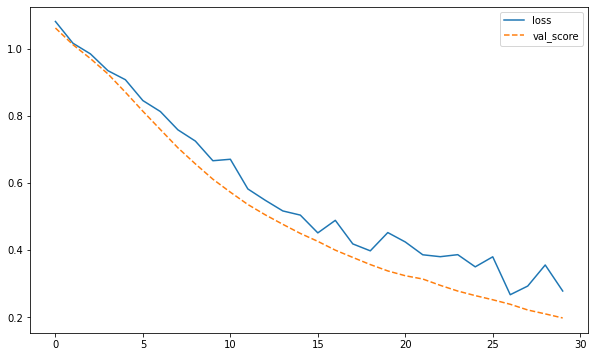

In [24]:
fig , ax = plt.subplots(figsize=(10,6))
 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

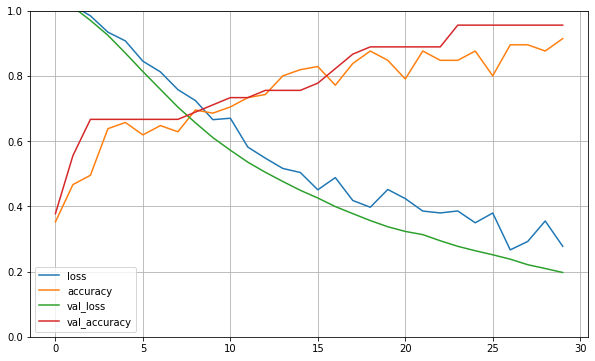

In [18]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
y_pred = model.predict(X_test_ss)

In [20]:
y_pred

array([[1.85872475e-03, 7.37822577e-02, 9.24359024e-01],
       [9.99118865e-01, 8.75578786e-04, 5.55172073e-06],
       [9.99073386e-01, 9.18167934e-04, 8.44490023e-06],
       [2.20814627e-02, 6.44512177e-01, 3.33406359e-01],
       [1.21657662e-01, 6.64878964e-01, 2.13463262e-01],
       [1.26230761e-01, 7.09558845e-01, 1.64210454e-01],
       [7.01061159e-04, 1.43141419e-01, 8.56157482e-01],
       [1.07371891e-02, 7.39333391e-01, 2.49929503e-01],
       [2.19344767e-03, 1.57324046e-01, 8.40482533e-01],
       [9.99390006e-01, 6.06864516e-04, 3.11027839e-06],
       [9.99732435e-01, 2.66957330e-04, 6.46341732e-07],
       [1.21732550e-02, 2.56452084e-01, 7.31374621e-01],
       [9.98309016e-01, 1.66572409e-03, 2.52054342e-05],
       [1.03003293e-01, 8.17849815e-01, 7.91468397e-02],
       [9.98950720e-01, 1.03867787e-03, 1.06057551e-05],
       [4.60542105e-02, 6.67058766e-01, 2.86887109e-01],
       [1.86827953e-03, 7.51522928e-02, 9.22979414e-01],
       [9.78332609e-02, 5.89710

In [21]:
y_pred = y_pred.argmax(axis=1)

In [22]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

